# Project: Wrangle and Analyze Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#gathering">Gathering data</a></li>
<li><a href="#assessing">Assessing data</a></li>
<li><a href="#cleaning">Cleaning data</a></li>
<li><a href="#storing">Storing data</a></li>
<li><a href="#analysing">Analyzing data</a></li>
<li><a href="#visualizing">Visualizing data</a></li>
</ul>

<a id='intro'></a>
## Introduction

The dataset that we will be wrangling, analyzing and visualizing is the tweet archive of Twitter user [@dog_rates](https://twitter.com/dog_rates), also known as [WeRateDogs](https://en.wikipedia.org/wiki/WeRateDogs). WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "[they're good dogs Brent.](http://knowyourmeme.com/memes/theyre-good-dogs-brent)"  [source](https://classroom.udacity.com/nanodegrees/nd002-alg-t2/parts/cd0015/modules/356d26d4-2237-46a0-ab78-e0ea93d9501a/lessons/ls2232/concepts/aa514310-e2cf-43d9-8165-aa6dd3b8472d#:~:text=The%20dataset%20that,dogs%20Brent.%22)

Some of the data is sources from the WeRateDogs [Twitter archive](https://d17h27t6h515a5.cloudfront.net/topher/2017/August/59a4e958_twitter-archive-enhanced/twitter-archive-enhanced.csv) and made available exclusively to Udacity, from where we will be gathering it. Udacity also went a step further and ran it through a neural network to detect the presence of a dog in every image in the tweets, and predicted the breed of the dog where applicable. A result of this is [provided to us](https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv). We will also query Twitter's API to enrich out data further.

I will gather the data, assess, clean, store, analyze, visualize the data, and finally report the insights observed below.

In [1]:
# import the relevant packages
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import tweepy
from tweepy import OAuthHandler
import json
import requests
from bs4 import BeautifulSoup
import time
from timeit import default_timer as timer
import os
from IPython import display

%matplotlib inline

# Gather

#### Twitter archive data

In [2]:
# load pregathered twitter archive data from downloaded file: twitter-archive-enhanced.csv
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

#### Image predictions

In [3]:
# gather the image_predictions.tsv file

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

# folder = 'my_folder'

# in case we go the folder way
# with open(os.path.join(folder, url.split('/')[-1]), mode='wb') as file: # 'image-predictions.tsv'
#    file.write(response.content)

with open('image-predictions.tsv', mode='wb') as file: # 'image-predictions.tsv'
    file.write(response.content)    

image_predictions = pd.read_csv('image-predictions.tsv', sep='\t')
    
# alternative to requests, we can load directly from website as:
# image_predictions = pd.read_csv(url, sep='\t')`

#### Twitter API data

In [4]:
# additional data from the twitter API

# Note: do not include your Twitter API keys, secrets, and tokens in your project submission.

# set up


# consumer_key = 'consumer_key'
# consumer_secret = 'consumer_secret'
# access_token = 'access_token'
# access_secret = 'access_secret'

# auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_secret)

# api = tweepy.API(auth, wait_on_rate_limit=True) # wait_on_rate_limit_notify=True raises an error

In [5]:
# Tweet IDs for which to gather additional data via Twitter's API
# Quering Twitter's API for JSON data for each tweet ID in the Twitter archive
tweet_ids = twitter_archive.tweet_id.values
#print('fetching tweets: ', len(tweet_ids))

#count = 0 
#fails_dict = {}
#start = timer()

# save tweets json in txt file
#with open('tweet_json.txt', 'w') as outfile:
     
#    for tweet_id in tweet_ids:
#        count += 1
#        print(str(count) + ': ' + str(tweet_id))
         
#        try:
#            tweet = api.get_status(tweet_id, tweet_mode='extended')
#            print('Success')
             
             # Each tweet's JSON data written to its own line.
#            json.dump(tweet._json, outfile)
#            outfile.write('\n')
             
#        except tweepy.errors.TweepyException as e:
#            print('Fail')
#            fails_dict[tweet_id] = e
#            pass
        
#end = timer()
#print(end-start)
#print(fails_dict)


In [6]:
# check if we got all the data from the API
#print('out of the ', len(tweet_ids),' ',len(fails_dict), 'tweets failed.')
#print('although a few did not have either a fail or success. I guess they raised an error that was not included in the except block')

# out of the  2356   29 tweets failed.
# although a few did not have either a fail or success. I guess they raised an error that was not included in the except block

In [7]:
# load data into a pandas DataFrame by reading txt file line by line.

json_file = 'tweet_json.txt'
with open(json_file, 'r', encoding='utf-8') as file:
    json_list = []
    for line in file:
        
        tweet = json.loads(line)
        
        # Gather each tweet's tweet ID, retweet count, and favorite count.
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        favourite_count = tweet['favorite_count']
        
        json_list.append({'tweet_id': tweet_id,
                          'retweet_count': retweet_count,
                         'favorite_count': favourite_count})
        

api_df = pd.DataFrame(json_list)

# Assess

In [8]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [9]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [10]:
api_df

,favorite_count,retweet_count,tweet_id
0,33711,6975,892420643555336193
1,29232,5276,892177421306343426
2,21982,3465,891815181378084864
3,36806,7196,891689557279858688
4,35191,7721,891327558926688256
5,17754,2589,891087950875897856
6,10335,1648,890971913173991426
7,56682,15688,890729181411237888
8,24432,3605,890609185150312448
9,27859,6074,890240255349198849


In [11]:
# inspect the pregathered twitter archive data
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [12]:
# image predictions data 
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [13]:
# api data 
api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
favorite_count    2327 non-null int64
retweet_count     2327 non-null int64
tweet_id          2327 non-null int64
dtypes: int64(3)
memory usage: 54.6 KB


Checking for duplicates

In [14]:
twitter_archive.duplicated().sum()

0

In [15]:
image_predictions.duplicated().sum()

0

In [16]:
api_df.duplicated().sum()

0

There were no duplicates found in the three datasets.

#### Assessing the Twitter archive dataset

In [17]:
twitter_archive.name[~twitter_archive.name.str.istitle()].unique()

array(['such', 'a', 'quite', 'not', 'one', 'incredibly', 'BeBe', 'mad',
       'an', 'very', 'just', 'DonDon', 'my', 'his', 'actually', 'getting',
       'this', 'unacceptable', 'all', 'old', 'infuriating', 'CeCe', 'the',
       'by', 'officially', 'life', 'light', 'space', 'JD', 'DayZ'], dtype=object)

In [18]:
twitter_archive.name.value_counts()

None       745
a           55
Charlie     12
Lucy        11
Oliver      11
Cooper      11
Lola        10
Tucker      10
Penny       10
Winston      9
Bo           9
the          8
Sadie        8
Bailey       7
an           7
Daisy        7
Buddy        7
Toby         7
Scout        6
Jax          6
Koda         6
Oscar        6
Bella        6
Leo          6
Dave         6
Milo         6
Jack         6
Stanley      6
Rusty        6
very         5
          ... 
Bloop        1
Sora         1
Chuq         1
Stewie       1
Ralphy       1
Banjo        1
Evy          1
Shawwn       1
Mark         1
Harlso       1
Stefan       1
Eugene       1
Samsom       1
Kota         1
Franq        1
Snoop        1
Strudel      1
Scott        1
Kirk         1
Ferg         1
Skittle      1
Walker       1
Goose        1
Lili         1
Ruffles      1
Barney       1
Kara         1
Marty        1
Dex          1
Crouton      1
Name: name, Length: 957, dtype: int64

Many records dont have dog names while others have incorrect name such as 'such', 'a', 'quite', 'not', 'one'.

In [19]:
# check for existence of a retweeted_status_id attribute to identify retweets
twitter_archive.retweeted_status_id.notnull().sum()

181

In [20]:
# check for existence of "in_reply_to_status_id" field to identify replies
twitter_archive.in_reply_to_status_id.notnull().sum()

78

The twitter archive dataset has 181 retweets and 78 reply tweets.

In [21]:
type(twitter_archive.timestamp.dtype)

numpy.dtype

The timestamp column is not a datetime format

In [22]:
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [23]:
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [24]:
twitter_archive[twitter_archive.rating_denominator != 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None


In [25]:
twitter_archive[twitter_archive.rating_denominator != 10].text.iloc[4]

'RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…'

In [26]:
weird_denominator = twitter_archive[twitter_archive.rating_denominator != 10].text
for tweet in range(len(weird_denominator)):
        print(weird_denominator.iloc[tweet],'\n')

@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho 

@docmisterio account started on 11/15/15 

The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd 

Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. 
Keep Sam smiling by clicking and sharing this link:
https://t.co/98tB8y7y7t https://t.co/LouL5vdvxx 

RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/… 

Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE 

After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ 

Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv 

Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a 

This is Bluebert. He just 

Some tweets appear to have ratings that are not about dogs while others have incorrect values in the rating numerator and denominator.
The tweet text also ends in a url instead of just text

In [27]:
twitter_archive.expanded_urls.isnull().sum()

59

Some rows in the expanded urls are empty.

#### Assessing the image_predictions dataset

We observe that there are:

- Three levels of image predictions.
- Unuseful columns such as image number.

In [28]:
# are there tweets with no dog image?
image_predictions[(image_predictions.p1_dog == False)
                  | (image_predictions.p2_dog == False) 
                  | (image_predictions.p3_dog == False)].p1.value_counts()

Chihuahua                   29
golden_retriever            24
Labrador_retriever          23
seat_belt                   22
web_site                    19
teddy                       18
chow                        17
Samoyed                     16
pug                         16
toy_poodle                  12
Pembroke                    11
Pomeranian                  10
dingo                        9
tennis_ball                  9
doormat                      8
Chesapeake_Bay_retriever     8
Siamese_cat                  7
swing                        7
bath_towel                   7
tub                          7
hamster                      7
home_theater                 6
French_bulldog               6
kelpie                       6
ice_bear                     6
car_mirror                   6
llama                        6
hippopotamus                 5
kuvasz                       5
shopping_cart                5
                            ..
trombone                     1
leopard 

In [29]:
image_predictions[(image_predictions.p1_dog == False)
                  & (image_predictions.p2_dog == False) 
                  & (image_predictions.p3_dog == False)].shape

(324, 12)

Some tweets (about 324) don't have a dog image.

#### Quality Issues

Data that has quality issues have issues with content like missing, duplicate, or incorrect data.

_Twitter archive dataset_
- The twitter archive dataset has 181 retweets and 78 reply tweets.✅
- Most tweets have no dog stage.✅
- The timestamp column is an object and not a datetime format.✅
- Many records dont have dog names while others have incorrect name such as 'such', 'a', 'quite', 'not', 'one'. ✅
- Some tweets appear to have ratings that are not about dogs while others have incorrect values in the rating numerator and denominator.
- Some tweets are not about dogs.
- The tweet text also ends in a url instead of just text.✅
- Some rows in the expanded urls are empty.✅
- Source is html tag.✅

_Image predictions dataset_
- Unuseful column such as image number. ✅
- Some tweets (about 324) don't have a dog image.✅

_API dataset_
- No issues

#### Tidiness Issues

Data that has specific structural issues that slow you down when cleaning and analyzing, visualizing, or modeling data later. _Tidy data requirements are that:_
_1. Each variable forms a column._
_2. Each observation forms a row._
_3. Each type of observational unit forms a table._

I identified the following issues:
- Dogs stages column headers are variables.✅
- Three levels of image predictions.✅
- The three datasets should be combined into one. ✅

All ticked✅ issues above will be cleaned below. 

# Cleaning the data

In this section, I clean the issues documented while assessing. 

First I will make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html).

After the cleaning, I will save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [30]:
# copies of original datasets
twitter_archive_copy = twitter_archive.copy()
image_predictions_copy = image_predictions.copy()
api_df_copy = api_df.copy()

**Issue: The twitter archive dataset has 181 retweets and 78 reply tweets**

#### Define 

Drop all the tweets that are retweets and replies.

#### Code 

In [31]:
# drop replies
twitter_archive_copy.drop(
    twitter_archive_copy[twitter_archive_copy.in_reply_to_status_id.notnull()].index, inplace=True)

In [32]:
# drop retweets
twitter_archive_copy.drop(
    twitter_archive_copy[twitter_archive_copy.retweeted_status_id.notnull()].index, inplace=True)

#### Test

In [33]:
# check for existence of "in_reply_to_status_id" field to identify replies and retweeted_status_id attribute to identify retweets
twitter_archive_copy[
    ['in_reply_to_status_id',
     'in_reply_to_user_id',
     'retweeted_status_id',
     'retweeted_status_user_id',
     'retweeted_status_timestamp']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 5 columns):
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
dtypes: float64(4), object(1)
memory usage: 98.3+ KB


All retweets and replies dropped. We can now drop the columns.

#### Code

In [34]:
# dropping columns
twitter_archive_copy.drop(
    ['in_reply_to_status_id',
     'in_reply_to_user_id',
     'retweeted_status_id',
     'retweeted_status_user_id',
     'retweeted_status_timestamp'],
    axis=1, inplace=True)

#### Test

In [35]:
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: int64(3), object(9)
memory usage: 213.0+ KB


Columns dropped successfully.

**Issue: Most tweets have no dog stage.**

#### Define 

Create column 'stage' and extract dog stage from text

#### Code 

In [36]:
#create a column for dog stage
twitter_archive_copy['dog_stage'] = twitter_archive_copy.text.str.extract('(doggo|floofer|pupper|puppo|dog|floof|pup)')

#### Test

In [37]:
# compare earlier stage counts vs the new column
archive = twitter_archive_copy
print(archive.doggo.value_counts(),'\n',
      archive.floofer.value_counts(),'\n',
      archive.pupper.value_counts(),'\n',
      archive.puppo.value_counts(),'\n')

None     2014
doggo      83
Name: doggo, dtype: int64 
 None       2087
floofer      10
Name: floofer, dtype: int64 
 None      1867
pupper     230
Name: pupper, dtype: int64 
 None     2073
puppo      24
Name: puppo, dtype: int64 



In [38]:
archive.dog_stage.value_counts()

dog        300
pupper     233
pup        203
doggo       75
puppo       27
floof       19
floofer      3
Name: dog_stage, dtype: int64

In [39]:
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 13 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dog_stage             860 non-null object
dtypes: int64(3), object(10)
memory usage: 229.4+ KB


#### Code 

In [40]:
# standardize dog stage names dog stage
replacements = {'dog':'doggo','pup':'pupper','floof':'floofer'}
twitter_archive_copy['dog_stage'] = twitter_archive_copy['dog_stage'].replace(replacements, regex=False)

#### Test

In [41]:
twitter_archive_copy.dog_stage.value_counts()

pupper     436
doggo      375
puppo       27
floofer     22
Name: dog_stage, dtype: int64

In [42]:
twitter_archive_copy[['doggo','floofer','pupper','puppo','dog_stage']].head(10)

,doggo,floofer,pupper,puppo,dog_stage
0,None,None,None,None,NaN
1,None,None,None,None,pupper
2,None,None,None,None,NaN
3,None,None,None,None,NaN
4,None,None,None,None,NaN
5,None,None,None,None,NaN
6,None,None,None,None,NaN
7,None,None,None,None,doggo
8,None,None,None,None,NaN
9,doggo,None,None,None,pupper


The unified dog stage column has been created successfully. Some values which were not initially captured, have been captured. Some values were also corrected.

**Issue: Dogs stages column headers are variables.**

#### Define 

Drop the doggo, flooper, pupper and puppo columns since we have captured the values in the dog_stage column, as per the tidy data guidelines.

#### Code 

In [43]:
# dropping columns
twitter_archive_copy.drop(['doggo','floofer','pupper','puppo'], axis=1, inplace=True)

#### Test

In [44]:
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
dog_stage             860 non-null object
dtypes: int64(3), object(6)
memory usage: 163.8+ KB


**Issue:Timestamp is not a datetime type**

#### Define 

Cast the timestamp column type to datetime

#### Code 

In [45]:
twitter_archive_copy['timestamp'] = twitter_archive_copy.timestamp.astype('datetime64')

#### Test

In [46]:
twitter_archive_copy.timestamp.dtype

dtype('<M8[ns]')

Type changed to datetime successfully.

**Issue: The tweet text also ends in a url instead of just text.**

#### Define 

Remove the url link from the text

#### Code 

In [47]:
# replace link with blank 
twitter_archive_copy['text'] = twitter_archive_copy.text.str.replace("(https://[\w\/\.]+$)", "", regex=True)

#### Test

In [48]:
# view a sample of the text 
twitter_archive_copy['text'][1]

"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 "

The links were removed successfully.

**Issue: The source is a html tag**

#### Define 

Retain only the contents of the tag and remove the html.

#### Code 

In [49]:
# replace the html tag with the string contents
twitter_archive_copy['source'].loc[twitter_archive_copy['source'] == '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'] = 'Twitter for iPhone'
twitter_archive_copy['source'].loc[twitter_archive_copy['source'] == '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>'] = 'Vine - Make a Scene'
twitter_archive_copy['source'].loc[twitter_archive_copy['source'] == '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>'] = 'Twitter Web Client'
twitter_archive_copy['source'].loc[twitter_archive_copy['source'] == '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'] = 'TweetDeck'

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


#### Test

In [50]:
#view a sample tweet 
twitter_archive_copy['source'].value_counts()

Twitter for iPhone     1964
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

**Issue: Some rows in the expanded urls are empty.**

#### Define 

Drop rows with no expanded urls

#### Code 

In [51]:
# drop rows with no expanded url
twitter_archive_copy.drop(
    twitter_archive_copy[twitter_archive_copy.expanded_urls.isnull()].index, inplace=True)

#### Test

In [52]:
twitter_archive_copy[twitter_archive_copy.expanded_urls.isnull()]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage


Empty expanded url rows dropped

**Issue: Many records dont have dog names while others have incorrect name such as 'such', 'a', 'quite', 'not', 'one'.**

#### Define 

Replace the incorrect names with nulls.

#### Code 

In [53]:
# it appears only those with lowercase names have incorrect name
twitter_archive_copy[twitter_archive_copy.name.str.lower() == twitter_archive_copy.name].name.value_counts()

a               55
the              8
an               6
one              4
very             4
quite            3
just             3
actually         2
not              2
getting          2
such             1
light            1
life             1
all              1
my               1
by               1
old              1
his              1
incredibly       1
unacceptable     1
infuriating      1
mad              1
officially       1
space            1
this             1
Name: name, dtype: int64

In [54]:
# replace lowercase names with nulls
twitter_archive_copy['name'] = twitter_archive_copy.name.apply(lambda x: x if str(x).lower()!=x else np.nan)

In [55]:
# also drop 'None' values in the name column
twitter_archive_copy['name'].replace('None', np.nan, inplace=True)

#### Test

In [56]:
#filter the names in lower case and find the count
twitter_archive_copy[twitter_archive_copy.name.str.lower() == twitter_archive_copy.name].name.value_counts()

Series([], Name: name, dtype: int64)

In [57]:
twitter_archive_copy.name.value_counts()

Lucy       11
Charlie    11
Cooper     10
Oliver     10
Penny       9
Tucker      9
Winston     8
Lola        8
Sadie       8
Toby        7
Daisy       7
Bo          6
Bailey      6
Oscar       6
Koda        6
Jax         6
Stanley     6
Bella       6
Dave        5
Buddy       5
Bentley     5
Scout       5
Leo         5
Rusty       5
Louis       5
Milo        5
Chester     5
Cassie      4
Chip        4
Alfie       4
           ..
Banjo       1
Burt        1
Stella      1
Shiloh      1
Sid         1
Mark        1
Scott       1
Strudel     1
Rhino       1
Hamrick     1
William     1
Jamesy      1
Wesley      1
Astrid      1
Derby       1
Huxley      1
Maxwell     1
Brownie     1
Mona        1
Snoop       1
Lipton      1
Ulysses     1
Shawwn      1
Harlso      1
Stefan      1
Eugene      1
Samsom      1
Kota        1
Franq       1
Ken         1
Name: name, Length: 929, dtype: int64

Incorrect names dropped successfully.

In [58]:
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2094 non-null int64
timestamp             2094 non-null datetime64[ns]
source                2094 non-null object
text                  2094 non-null object
expanded_urls         2094 non-null object
rating_numerator      2094 non-null int64
rating_denominator    2094 non-null int64
name                  1390 non-null object
dog_stage             859 non-null object
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 163.6+ KB


### Image predictions dataset cleaning

issue: Some tweets don't have a dog image. This is indicated by all prediction columns not have not detected a dog by the neural network in the image.

#### Define 

Drop all tweets with no dog in image.

#### Code 

In [59]:
image_predictions_copy.drop(
image_predictions_copy[(image_predictions_copy.p1_dog == False)
                  & (image_predictions_copy.p2_dog == False) 
                  & (image_predictions_copy.p3_dog == False)].index, inplace=True
)

#### Test

In [60]:
# check for existence of tweets where no dogs exist in the image.
image_predictions_copy[(image_predictions_copy.p1_dog == False)
                  & (image_predictions_copy.p2_dog == False) 
                  & (image_predictions_copy.p3_dog == False)].shape

(0, 12)

**Issue: Three levels of image predictions.**

#### Define 

Check columns p1_dog p2_dog and p3_dog if true, then check p1, p2 or p3 respectively for dog breed 

#### Code 

In [61]:
# create new columns to capture breed and confidence level
image_predictions_copy['dog_breed'] = np.nan
image_predictions_copy['confidence_level'] = np.nan

In [62]:
for tweet in range(len(image_predictions_copy)):
    if image_predictions_copy.p1_dog.iloc[tweet]:
        image_predictions_copy['dog_breed'].iloc[tweet] = image_predictions_copy['p1'].iloc[tweet]
        image_predictions_copy['confidence_level'].iloc[tweet] = image_predictions_copy['p1_conf'].iloc[tweet]
    elif image_predictions_copy.p2_dog.iloc[tweet]:
        image_predictions_copy['dog_breed'].iloc[tweet] = image_predictions_copy['p2'].iloc[tweet]
        image_predictions_copy['confidence_level'].iloc[tweet] = image_predictions_copy['p2_conf'].iloc[tweet]
    elif image_predictions_copy.p3_dog.iloc[tweet]:
        image_predictions_copy['dog_breed'].iloc[tweet] = image_predictions_copy['p3'].iloc[tweet]
        image_predictions_copy['confidence_level'].iloc[tweet] = image_predictions_copy['p3_conf'].iloc[tweet]

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


#### Test

In [63]:
image_predictions_copy.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_breed,confidence_level
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,miniature_pinscher,0.560311
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True,Bernese_mountain_dog,0.651137
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False,chow,0.692517
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True,golden_retriever,0.007959
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True,miniature_poodle,0.201493
10,666063827256086533,https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg,1,golden_retriever,0.775930,True,Tibetan_mastiff,0.093718,True,Labrador_retriever,0.072427,True,golden_retriever,0.775930


In [64]:
image_predictions_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 14 columns):
tweet_id            1751 non-null int64
jpg_url             1751 non-null object
img_num             1751 non-null int64
p1                  1751 non-null object
p1_conf             1751 non-null float64
p1_dog              1751 non-null bool
p2                  1751 non-null object
p2_conf             1751 non-null float64
p2_dog              1751 non-null bool
p3                  1751 non-null object
p3_conf             1751 non-null float64
p3_dog              1751 non-null bool
dog_breed           1751 non-null object
confidence_level    1751 non-null float64
dtypes: bool(3), float64(4), int64(2), object(5)
memory usage: 169.3+ KB


**Issue: Unuseful columns such as image number**

#### Define 

Drop img_num, p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog columns.

#### Code 

In [65]:
# drop columns
image_predictions_copy.drop(
    ['img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
    axis=True, inplace=True)

#### Test

In [66]:
image_predictions_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 4 columns):
tweet_id            1751 non-null int64
jpg_url             1751 non-null object
dog_breed           1751 non-null object
confidence_level    1751 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 68.4+ KB


**Issue:The three datasets should be combined into one.**

#### Define 

Merge the three datasets into one.
I will do an inner join to take only the common tweets in all the three datasets.

#### Code 

In [67]:
# merging twitter_archive_copy, image_predictions_copy, api_df_copy
twitter_archive_master = pd.merge(
    twitter_archive_copy, image_predictions_copy, on='tweet_id', how='inner'
    ).merge(api_df_copy, on='tweet_id', how='inner')

#### Test

In [68]:
# view a section of the merged dataframe
twitter_archive_master

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,dog_breed,confidence_level,favorite_count,retweet_count
0,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,pupper,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,29232,5276
1,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,21982,3465
2,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Labrador_retriever,0.168086,36806,7196
3,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,35191,7721
4,891087950875897856,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,NaN,NaN,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,Chesapeake_Bay_retriever,0.425595,17754,2589
5,890971913173991426,2017-07-28 16:27:12,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,NaN,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,Appenzeller,0.341703,10335,1648
6,890729181411237888,2017-07-28 00:22:40,Twitter for iPhone,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,NaN,doggo,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,Pomeranian,0.566142,56682,15688
7,890609185150312448,2017-07-27 16:25:51,Twitter for iPhone,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,NaN,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,Irish_terrier,0.487574,24432,3605
8,890240255349198849,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,pupper,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,Pembroke,0.511319,27859,6074
9,890006608113172480,2017-07-26 00:31:25,Twitter for iPhone,This is Koda. He is a South Australian decksha...,https://twitter.com/dog_rates/status/890006608...,13,10,Koda,NaN,https://pbs.twimg.com/media/DFnwSY4WAAAMliS.jpg,Samoyed,0.957979,26953,6114


In [69]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1658 entries, 0 to 1657
Data columns (total 14 columns):
tweet_id              1658 non-null int64
timestamp             1658 non-null datetime64[ns]
source                1658 non-null object
text                  1658 non-null object
expanded_urls         1658 non-null object
rating_numerator      1658 non-null int64
rating_denominator    1658 non-null int64
name                  1179 non-null object
dog_stage             625 non-null object
jpg_url               1658 non-null object
dog_breed             1658 non-null object
confidence_level      1658 non-null float64
favorite_count        1658 non-null int64
retweet_count         1658 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(5), object(7)
memory usage: 194.3+ KB


1658 tweets made it to the final dataframe, with 14 attibutes describing the dataframe.

## Storing Data
Saving gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [70]:
twitter_archive_master.to_csv("twitter_archive_master.csv", index=False)

## Analyzing and Visualizing Data
In this section, I analyze and visualize the wrangled data.

In our analysis, we seek to know:

1. Which is the most popular tweet in our dataset through favourite count and retweet count?

2. Which is the most common dog breed in our dataset?

3. Is there a relationship between the rating_numerator and  the favorite_count?

In [71]:
# the most favorited tweet in our dataset 
twitter_archive_master.iloc[twitter_archive_master.favorite_count.idxmax()]

tweet_id                                             744234799360020481
timestamp                                           2016-06-18 18:26:18
source                                               Twitter for iPhone
text                  Here's a doggo realizing you can stand in a po...
expanded_urls         https://twitter.com/dog_rates/status/744234799...
rating_numerator                                                     13
rating_denominator                                                   10
name                                                                NaN
dog_stage                                                         doggo
jpg_url               https://pbs.twimg.com/ext_tw_video_thumb/74423...
dog_breed                                            Labrador_retriever
confidence_level                                               0.825333
favorite_count                                                   144310
retweet_count                                                   

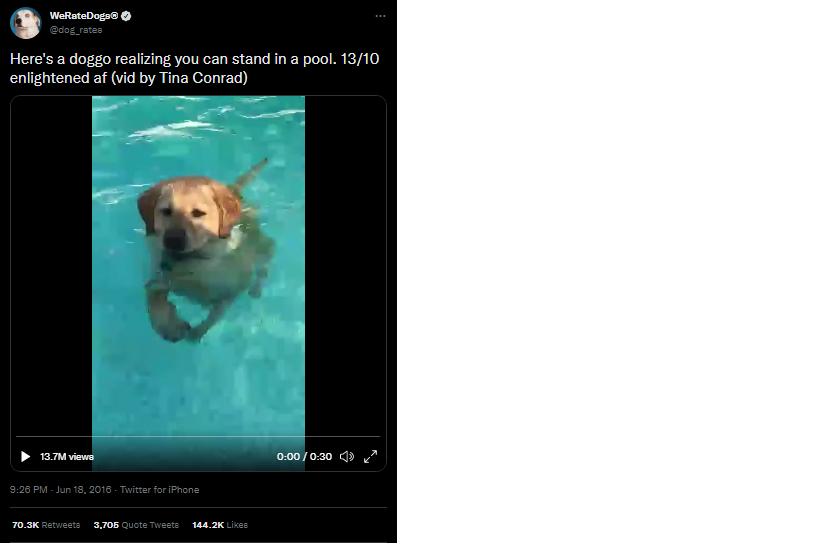

In [72]:
# here is the tweet
fav_tweet = 'https://twitter.com/dog_rates/status/'\
            + twitter_archive_master.iloc[twitter_archive_master.favorite_count.idxmax()].tweet_id.astype(str)

display.Image('fav_tweet.png')

In [73]:
# It is also the most retweeted tweet in our dataset.
twitter_archive_master.iloc[twitter_archive_master.retweet_count.idxmax()]

tweet_id                                             744234799360020481
timestamp                                           2016-06-18 18:26:18
source                                               Twitter for iPhone
text                  Here's a doggo realizing you can stand in a po...
expanded_urls         https://twitter.com/dog_rates/status/744234799...
rating_numerator                                                     13
rating_denominator                                                   10
name                                                                NaN
dog_stage                                                         doggo
jpg_url               https://pbs.twimg.com/ext_tw_video_thumb/74423...
dog_breed                                            Labrador_retriever
confidence_level                                               0.825333
favorite_count                                                   144310
retweet_count                                                   

The tweet with the tweet_id 744234799360020481, tweeted on 2016-06-18 18:26:18, is the most favourited (144310 times) and retweeted (70366 times) tweet in our dataset.

In [74]:
# Popularity of dog breeds by value counts 
twitter_archive_master.dog_breed.value_counts()

golden_retriever                  156
Labrador_retriever                103
Pembroke                           94
Chihuahua                          90
pug                                62
toy_poodle                         49
chow                               48
Pomeranian                         41
Samoyed                            41
malamute                           33
Chesapeake_Bay_retriever           31
French_bulldog                     30
cocker_spaniel                     30
miniature_pinscher                 24
Eskimo_dog                         22
Cardigan                           21
German_shepherd                    21
Shih-Tzu                           20
beagle                             20
Siberian_husky                     20
Maltese_dog                        19
Staffordshire_bullterrier          19
Shetland_sheepdog                  18
Rottweiler                         18
kuvasz                             17
Italian_greyhound                  17
Lakeland_ter

The Golden Retriever breed is the most common dog breed in our dataset with 156 entries.

In [75]:
# Is there a relationship between the rating_numerator and  the favorite_count?
# We can test this with the aid of a correlation coefficient
twitter_archive_master.corr(method='pearson')

,tweet_id,rating_numerator,rating_denominator,confidence_level,favorite_count,retweet_count
tweet_id,1.000000,0.110186,-0.024830,0.100346,0.600341,0.374537
rating_numerator,0.110186,1.000000,0.940160,0.038629,0.072682,0.057454
rating_denominator,-0.024830,0.940160,1.000000,0.002625,-0.026462,-0.018155
confidence_level,0.100346,0.038629,0.002625,1.000000,0.047392,0.018253
favorite_count,0.600341,0.072682,-0.026462,0.047392,1.000000,0.930455
retweet_count,0.374537,0.057454,-0.018155,0.018253,0.930455,1.000000


We observe that there is a weak positive correlation between the favorite count and and the rating numerator at 0.07.

### Insights:
1. The tweet with the tweet_id 744234799360020481, tweeted on 2016-06-18 18:26:18, is the most favourited (144310 times) and retweeted (70366 times) tweet in our dataset.
2. The Golden Retriever breed is the most common dog breed in our dataset with 156 entries.
3. We observe that there is a weak positive correlation between the favorite count and and the rating numerator at 0.07.

### Visualization

Text(0.5,1,'Relationship between the favorite count and the rating numerator')

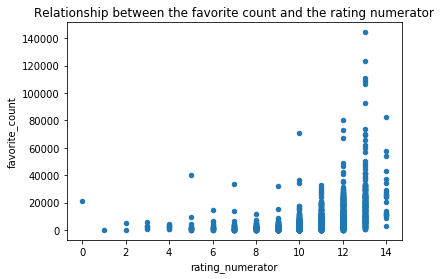

In [76]:
# ploting the relationship between the favorite count and the rating numerator.
twitter_archive_master[twitter_archive_master.rating_numerator < 15].plot.scatter('rating_numerator', 'favorite_count')
plt.title('Relationship between the favorite count and the rating numerator')